# Creating the Scene:

Write a script that can generate scenes with sets of convex polygonal obstacles. Scene itself is a continuous space of 2m x 2m. (What is m?) Polygons are in np arrays. Use 800 x 800 px for now. Should be able to visualize scene and load/store it in a file


Input:
 - P: the total number of polygons in the scene
 - N_{min}: minimum number of vertices
 - N_{max}: maximum number of vertices
 - r_{min}: min radius
 - r_{max}: max radius


In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import ConvexHull

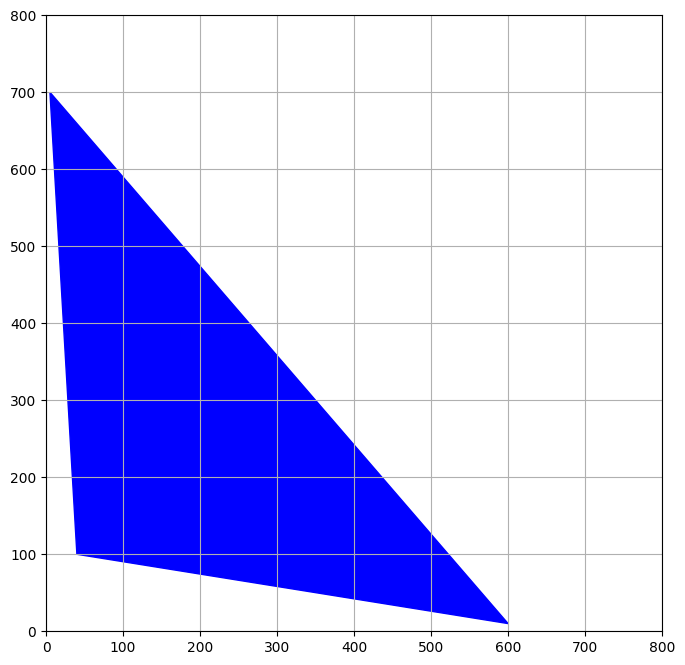

In [9]:
#Manually make a polygon and visualize

#define vertices in np array
vertices = np.array([[40, 100], [5, 700], [600, 10]])

# create figure and axis
fig, ax = plt.subplots(figsize = (8,8))

# use vertices to make polygon and add to axis
polygon = plt.Polygon(vertices, closed = True, color = 'b')
ax.add_patch(polygon)

ax.set_xlim(0, 800)
ax.set_ylim(0, 800)
plt.gca().set_aspect('equal', adjustable='box')  # Make sure the aspect ratio is equal
plt.grid(True)
plt.show()

6
6
6
5
8


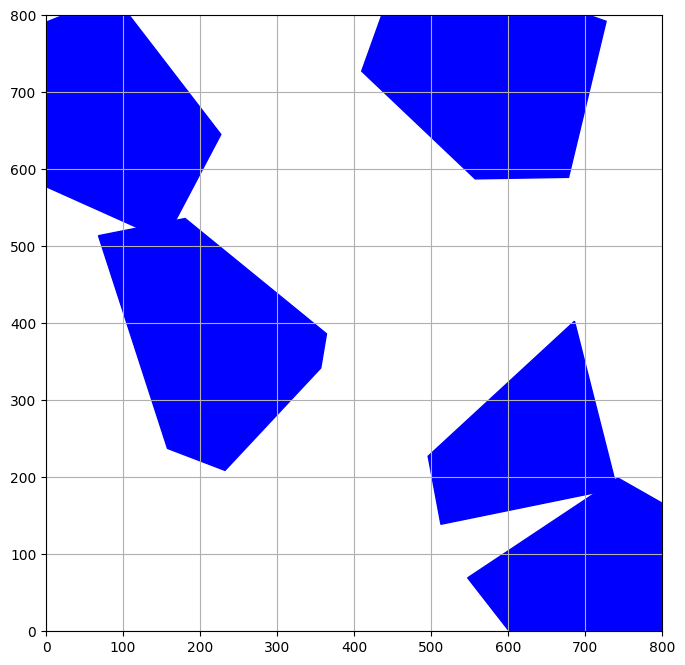

In [2]:
# Returns an np array of convex polygons (2D-np array)
def make_polygons(p, n_min, n_max, r_min, r_max, xdim ,ydim):
    # define center of all the polygons
    center_pol = []
    
    for _ in range(p):
        x,y = random.uniform(0, xdim), random.uniform(0, ydim)
        num_vertices = random.randint(n_min, n_max)
        center_pol.append((x,y, num_vertices))

    polygons = []

    for center in center_pol:
        vertices = []
        print(center[2])
        for _ in range(center[2]):
            radius = random.uniform(r_min, r_max)
            angle = random.uniform(0,2*np.pi) #get angle in radians
            x,y = center[0] + radius*np.cos(angle), center[1] + radius*np.sin(angle)
            vertices.append([x,y])

        vertices = np.array(vertices)
        hull = ConvexHull(vertices)
        polygons.append(vertices[hull.vertices])
        
    return np.array(polygons, dtype = object)

# Takes in our generated polygons and generates scene that's 800 x 800 px
def show_scene(polygons):
    fig, ax = plt.subplots(figsize = (8,8))
    for polygon in polygons:
        pol = plt.Polygon(polygon, closed = True, color = 'b')
        ax.add_patch(pol)
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 800)
    plt.gca().set_aspect('equal', adjustable='box')  # Make sure the aspect ratio is equal
    plt.grid(True)
    plt.show()
    
            

polygons = make_polygons(5, 5, 8, 100, 200, 800, 800)
show_scene(polygons=polygons)

                
    
    

In [3]:
bb = [np.array([polygon.min(axis=0), polygon.max(axis=0)]) for polygon in polygons]
print(bb)

[array([[-80.79191543, 508.08729505],
       [226.95057242, 826.12697666]]), array([[496.17082325, 138.9831903 ],
       [741.2081495 , 402.59878007]]), array([[ 68.03645555, 208.91695617],
       [364.1590821 , 536.08306299]]), array([[ 547.49658968, -165.22784885],
       [ 888.10597379,  199.09313428]]), array([[409.86923779, 587.53417304],
       [727.31136756, 856.91786645]])]
